In [1]:
print("test")

test


In [2]:
home_path = '/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/'

# Analysis

In [3]:
import pandas as pd
# from LabData.DataLoaders.GutMBLoader import GutMBLoader
# from LabData.DataLoaders.SubjectLoader import SubjectLoader
# from LabData.DataLoaders.DietLoggingLoader import DietLoggingLoader
# from LabData.DataAnalyses.TenK_Trajectories.utils import get_diet_logging_around_stage
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from statistics import mean
from scipy import stats
import matplotlib.pyplot as plt
import pickle
import lightgbm as lgb
import math
from statsmodels.stats.multitest import multipletests

In [4]:
def read_results(df):
    output = []
    for col in df.columns:
        output.append(df[col])
    return tuple(output)

In [5]:
diet_mb = pd.read_pickle(home_path + "data/diet_mb.pkl")
with open(home_path + 'data/my_lists.pkl', 'rb') as file:
    loaded_lists = pickle.load(file)
base_features, all_features, targets = loaded_lists
diet_mb

,Acorn squash,Alfalfa sprouts,Almond Beverage,Almond flour,Almond spread,Almonds,Amba,Anchovy,Aperol,Apple,...,fBin__88|gBin__434|sBin__637,fBin__94|gBin__448|sBin__654,fBin__94|gBin__449|sBin__656,fBin__95|gBin__450|sBin__659,fBin__96|gBin__457|sBin__669,fBin__97|gBin__462|sBin__676,fBin__97|gBin__462|sBin__678,fBin__99|gBin__469|sBin__687,Richness,Shannon_diversity
RegistrationCode,,,,,,,,,,,,,,,,,,,,,
10K_1000942861,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.016416,...,-4.000000,-4.000000,-4.0,-4.0,-4.0,-4.000000,-4.000000,-4.000000,189,3.71
10K_1001201093,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.013895,...,-4.000000,-4.000000,-4.0,-4.0,-4.0,-4.000000,-4.000000,-4.000000,150,3.30
10K_1002254441,0.0,0.000000,0.0,0.0,0.0,0.080736,0.0,0.0,0.000000,0.000000,...,-4.000000,-3.368405,-4.0,-4.0,-4.0,-4.000000,-2.523371,-4.000000,250,3.32
10K_1003113258,0.0,0.000000,0.0,0.0,0.0,0.002037,0.0,0.0,0.000000,0.008880,...,-4.000000,-3.677630,-4.0,-4.0,-4.0,-4.000000,-3.861761,-4.000000,262,3.90
10K_1007330152,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,-2.494574,-4.000000,-4.0,-4.0,-4.0,-4.000000,-1.941250,-2.985687,194,3.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10K_9995823183,0.0,0.000054,0.0,0.0,0.0,0.051311,0.0,0.0,0.000000,0.000000,...,-3.610761,-3.347382,-4.0,-4.0,-4.0,-2.503550,-2.421434,-4.000000,206,3.57
10K_9996884777,0.0,0.000000,0.0,0.0,0.0,0.002401,0.0,0.0,0.000000,0.000000,...,-3.213395,-3.367979,-4.0,-4.0,-4.0,-4.000000,-3.850233,-3.804074,257,3.89
10K_9998420917,0.0,0.000000,0.0,0.0,0.0,0.019408,0.0,0.0,0.000000,0.018232,...,-2.803094,-3.327214,-4.0,-4.0,-4.0,-2.582016,-2.457185,-4.000000,264,4.13


## Microbes Targets

### Age and Gender

In [6]:
# def train_test(df, features, target_list, MODEL):
#     all_accuracy = []
#     all_auc =[]
#     all_feat_importances = []
#     all_preds = []
#     all_targets = []
#     for target in target_list:
#         df = df.dropna(subset=[target])

#         df[target] = df[target].apply(lambda x: 0 if x == -4 else 1)
        
#         kf = KFold(n_splits=5, shuffle=False, random_state=1)
#         preds = []
#         targets = []
#         pred_probs_list = []
#         for train_index, test_index in kf.split(df):
#             train = df.iloc[train_index]
#             test = df.iloc[test_index]

#             if MODEL == 'logistic':
#                 model = linear_model.LogisticRegression(
#                     max_iter=1000,  # Increase if needed for convergence,
#                     class_weight='balanced',  # To account for class imbalance
#                     random_state=1
#                 )
#             elif MODEL == 'LGBM':
#                 model = lgb.LGBMClassifier(
#                     max_depth=4, 
#                     n_estimators=2000, 
#                     subsample=0.5, 
#                     subsample_freq=1, 
#                     colsample_bytree=0.3, 
#                     learning_rate=0.001, 
#                     n_jobs=8, 
#                     random_state=1,
#                     objective='binary',
#                     is_unbalance=True
#                 )
#             model.fit(train[features], train[target])
#             predictions = model.predict(test[features])
#             pred_probs = model.predict_proba(test[features])[:, 1]  # For AUC calculation
        
#             preds.extend(predictions)
#             targets.extend(test[target])
#             pred_probs_list.extend(pred_probs)

#         # Calculate accuracy and AUC
#         accuracy = accuracy_score(targets, preds)
#         auc = roc_auc_score(targets, pred_probs_list)

#         all_accuracy.append(accuracy)
#         all_auc.append(auc)

#         if MODEL == 'logistic':
#             all_feat_importances.append(model.coef_)
#             # all_feat_names.append(features)
#         if MODEL == 'LGBM':
#             all_feat_importances.append(model.feature_importances_)
#             # all_feat_names.append(model.feature_name_)

#         # all_preds.append(preds)
#         # all_targets.append(targets)
        
#     return all_accuracy, all_auc, all_feat_importances

In [7]:
# lgbm_base_acc, lgbm_base_auc, lgbm_base_coefs = train_test(diet_mb, base_features, targets, "LGBM")
lgbm_base_acc, lgbm_base_auc, lgbm_base_coefs, lgbm_base_preds, lgbm_base_targets, lgbm_base_pvalues = read_results(pd.read_pickle(home_path + "data/classification/output_base_LGBM_abundance.pkl"))
lgbm_base_auc

ValueError: not enough values to unpack (expected 6, got 5)

In [8]:
# log_base_acc, log_base_auc, log_base_coefs = train_test(diet_mb, base_features, targets, "logistic")
log_base_acc, log_base_auc, log_base_coefs, log_base_preds, log_base_targets, log_pvalues_auc, log_base_pvalues = read_results(pd.read_pickle(home_path + "data/classification/output_base_logistic_abundance.pkl"))
log_base_auc

0      0.531262
1      0.559638
2      0.519922
3      0.568948
4      0.544962
         ...   
720    0.541919
721    0.539300
722    0.505973
723    0.521016
724    0.517827
Name: 1, Length: 725, dtype: float64

In [9]:
# # # Save base models results

# log_base_res = pd.concat([pd.Series(log_base_acc), pd.Series(log_base_auc), pd.Series(log_base_coefs)], axis=1)
# log_base_res.to_pickle(home_path + "data/classification/log_base_abundance.pkl")


# lgbm_base_res = pd.concat([pd.Series(lgbm_base_acc), pd.Series(lgbm_base_auc), pd.Series(lgbm_base_coefs)], axis=1)
# lgbm_base_res.to_pickle(home_path + "data/classification/lgbm_base_abundance.pkl")

### Diet

In [18]:
lgbm_diet_acc, lgbm_diet_auc, lgbm_diet_coefs, lgbm_diet_preds, lgbm_diet_targets, lgbm_diet_pvalues = read_results(pd.read_pickle(home_path + "data/classification/output_LGBM_abundance.pkl"))
print(lgbm_diet_acc)
print(lgbm_diet_auc)

0      0.890665
1      0.896854
2      0.780686
3      0.565756
4      0.881511
         ...   
720    0.935663
721    0.915162
722    0.894275
723    0.558922
724    0.773337
Name: 0, Length: 725, dtype: float64
0      0.594952
1      0.563676
2      0.501016
3      0.567452
4      0.555090
         ...   
720    0.545231
721    0.565566
722    0.551801
723    0.533919
724    0.589529
Name: 1, Length: 725, dtype: float64


In [19]:
def drop_na_series(*series):
    """Drop NaN values from multiple pandas Series."""
    return [pd.Series(s).dropna() for s in series]

# Apply function
(lgbm_diet_acc, lgbm_diet_auc, lgbm_diet_coefs, 
 lgbm_diet_preds, lgbm_diet_targets, lgbm_diet_pvalues) = drop_na_series(
    lgbm_diet_acc, lgbm_diet_auc, lgbm_diet_coefs, 
    lgbm_diet_preds, lgbm_diet_targets, lgbm_diet_pvalues
)


In [20]:
lgbm_diet_auc.describe()

count    717.000000
mean       0.579238
std        0.040897
min        0.481898
25%        0.554000
50%        0.571331
75%        0.600526
max        0.811450
Name: 1, dtype: float64

In [7]:
# lgbm_diet_acc, lgbm_diet_auc_noreg, lgbm_diet_coefs, lgbm_diet_preds, lgbm_diet_targets, lgbm_diet_auc_pvalues = read_results(pd.read_pickle(home_path + "data/classification/output_LGBM_abundance_noearlystop_noreg.pkl"))
# _, lgbm_diet_auc_1_20, _, _, _ = read_results(pd.read_pickle(home_path + "data/classification/output_LGBM_abundance_noearlystop_1_20.pkl"))
# _, lgbm_diet_auc_5_50, _, _, _ = read_results(pd.read_pickle(home_path + "data/classification/output_LGBM_abundance_noearlystop_5_50.pkl"))
# _, lgbm_diet_auc_10_75, _, _, _ = read_results(pd.read_pickle(home_path + "data/classification/output_LGBM_abundance_noearlystop_10_75.pkl"))
# _, lgbm_diet_auc_15_100, _, _, _ = read_results(pd.read_pickle(home_path + "data/classification/output_LGBM_abundance_noearlystop_15_100.pkl"))

In [34]:
# print(lgbm_diet_auc.dtype)


float64


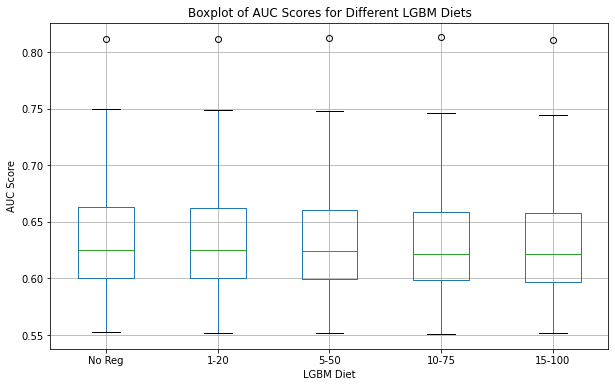

Summary Statistics:
             min    median      mean       max       IQR
No Reg  0.553030  0.624985  0.632489  0.811695  0.062546
1-20    0.551911  0.624792  0.632341  0.811450  0.062086
5-50    0.551482  0.623963  0.631796  0.812570  0.061069
10-75   0.550884  0.621792  0.630406  0.813073  0.060486
15-100  0.551326  0.621219  0.628918  0.811205  0.060512

Ranks (1 = best, 5 = worst):
        min_rank  median_rank  mean_rank  max_rank  IQR_rank
No Reg       1.0          1.0        1.0       3.0       5.0
1-20         2.0          2.0        2.0       4.0       4.0
5-50         3.0          3.0        3.0       2.0       3.0
10-75        5.0          4.0        4.0       1.0       1.0
15-100       4.0          5.0        5.0       5.0       2.0

Overall Mean Rank for each model (lower is better):
No Reg    2.2
1-20      2.8
5-50      2.8
10-75     3.0
15-100    4.2
Name: Overall_Mean_Rank, dtype: float64


In [17]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Convert each dataset into a pandas Series with a name
# s_noreg   = pd.Series(lgbm_diet_auc_noreg, name='No Reg')
# s_1_20    = pd.Series(lgbm_diet_auc_1_20, name='1-20')
# s_5_50    = pd.Series(lgbm_diet_auc_5_50, name='5-50')
# s_10_75   = pd.Series(lgbm_diet_auc_10_75, name='10-75')
# s_15_100  = pd.Series(lgbm_diet_auc_15_100, name='15-100')

# # Combine them into a DataFrame (each column is one model)
# df = pd.concat([s_noreg, s_1_20, s_5_50, s_10_75, s_15_100], axis=1)

# # Plot the boxplot for a visual comparison
# plt.figure(figsize=(10, 6))
# df.boxplot()
# plt.xlabel('LGBM Diet')
# plt.ylabel('AUC Score')
# plt.title('Boxplot of AUC Scores for Different LGBM Diets')
# plt.show()

# # Calculate summary statistics for each model
# summary_stats = pd.DataFrame({
#     'min': df.min(),
#     'median': df.median(),
#     'mean': df.mean(),
#     'max': df.max(),
#     # Calculate variability as the IQR (75th percentile - 25th percentile)
#     'IQR': df.quantile(0.75) - df.quantile(0.25)
# })

# print("Summary Statistics:")
# print(summary_stats)

# # Ranking:
# # For min, median, mean, and max, a higher value is better (rank descending: 1 = highest)
# # For variability (IQR), a lower value is better (rank ascending: 1 = lowest spread)

# ranks = pd.DataFrame({
#     'min_rank': summary_stats['min'].rank(ascending=False, method='min'),
#     'median_rank': summary_stats['median'].rank(ascending=False, method='min'),
#     'mean_rank': summary_stats['mean'].rank(ascending=False, method='min'),
#     'max_rank': summary_stats['max'].rank(ascending=False, method='min'),
#     'IQR_rank': summary_stats['IQR'].rank(ascending=True, method='min')  # Lower variability is better
# })

# print("\nRanks (1 = best, 5 = worst):")
# print(ranks)

# # Calculate the mean rank across all criteria for each model
# ranks['Overall_Mean_Rank'] = ranks.mean(axis=1)

# print("\nOverall Mean Rank for each model (lower is better):")
# print(ranks['Overall_Mean_Rank'])


### Choose Significant Targets without permutations

In [21]:
# How many predictions were statistically significant?
signifancts = lgbm_diet_pvalues[lgbm_diet_pvalues < 0.05].shape[0]
print("{} significant predictions ({}%)".format(signifancts, round((signifancts/len(lgbm_diet_pvalues))*100), 2))

694 significant predictions (97%)


In [22]:
lgbm_diet_pvalues_adj = multipletests(lgbm_diet_pvalues, method='fdr_bh', alpha=0.05)[1]
lgbm_diet_pvalues_adj = pd.Series(lgbm_diet_pvalues_adj)
pd.Series(lgbm_diet_pvalues_adj).sort_values()


0      0.000000
457    0.000000
458    0.000000
459    0.000000
460    0.000000
         ...   
380    0.560125
382    0.640681
597    0.755106
677    0.789101
383    0.872000
Length: 717, dtype: float64

In [25]:
# How many predictions were statistically significant after adjustment?
significants_adj = lgbm_diet_pvalues_adj[lgbm_diet_pvalues_adj < 0.05].shape[0]
print("{} significant predictions ({}%) after adjustment.".format(significants_adj, round((signifancts/len(lgbm_diet_pvalues))*100), 2))

694 significant predictions (97%) after adjustment.


In [26]:
significant_targets = [target for target, p_adj in zip(targets, lgbm_diet_pvalues_adj) if p_adj < 0.05]
print(targets)
print(len(targets))
print(significant_targets)
print(len(significant_targets))


['fBin__100|gBin__473|sBin__693', 'fBin__100|gBin__473|sBin__694', 'fBin__100|gBin__474|sBin__695', 'fBin__100|gBin__477|sBin__698', 'fBin__100|gBin__481|sBin__704', 'fBin__100|gBin__481|sBin__705', 'fBin__100|gBin__481|sBin__706', 'fBin__100|gBin__483|sBin__709', 'fBin__102|gBin__490|sBin__720', 'fBin__102|gBin__490|sBin__721', 'fBin__102|gBin__490|sBin__722', 'fBin__103|gBin__491|sBin__727', 'fBin__104|gBin__493|sBin__730', 'fBin__104|gBin__494|sBin__731', 'fBin__104|gBin__495|sBin__732', 'fBin__104|gBin__496|sBin__733', 'fBin__104|gBin__496|sBin__734', 'fBin__104|gBin__498|sBin__736', 'fBin__104|gBin__500|sBin__738', 'fBin__108|gBin__515|sBin__766', 'fBin__108|gBin__515|sBin__767', 'fBin__108|gBin__517|sBin__769', 'fBin__108|gBin__521|sBin__773', 'fBin__108|gBin__523|sBin__776', 'fBin__108|gBin__525|sBin__778', 'fBin__108|gBin__526|sBin__779', 'fBin__108|gBin__531|sBin__787', 'fBin__121|gBin__564|sBin__834', 'fBin__121|gBin__566|sBin__836', 'fBin__121|gBin__568|sBin__838', 'fBin__12

In [27]:
significant_targets_index = [index for index, (target, p_adj) in enumerate(zip(targets, lgbm_diet_pvalues_adj)) if p_adj < 0.05]
print(targets)
print(significant_targets_index)


['fBin__100|gBin__473|sBin__693', 'fBin__100|gBin__473|sBin__694', 'fBin__100|gBin__474|sBin__695', 'fBin__100|gBin__477|sBin__698', 'fBin__100|gBin__481|sBin__704', 'fBin__100|gBin__481|sBin__705', 'fBin__100|gBin__481|sBin__706', 'fBin__100|gBin__483|sBin__709', 'fBin__102|gBin__490|sBin__720', 'fBin__102|gBin__490|sBin__721', 'fBin__102|gBin__490|sBin__722', 'fBin__103|gBin__491|sBin__727', 'fBin__104|gBin__493|sBin__730', 'fBin__104|gBin__494|sBin__731', 'fBin__104|gBin__495|sBin__732', 'fBin__104|gBin__496|sBin__733', 'fBin__104|gBin__496|sBin__734', 'fBin__104|gBin__498|sBin__736', 'fBin__104|gBin__500|sBin__738', 'fBin__108|gBin__515|sBin__766', 'fBin__108|gBin__515|sBin__767', 'fBin__108|gBin__517|sBin__769', 'fBin__108|gBin__521|sBin__773', 'fBin__108|gBin__523|sBin__776', 'fBin__108|gBin__525|sBin__778', 'fBin__108|gBin__526|sBin__779', 'fBin__108|gBin__531|sBin__787', 'fBin__121|gBin__564|sBin__834', 'fBin__121|gBin__566|sBin__836', 'fBin__121|gBin__568|sBin__838', 'fBin__12

In [28]:
with open(home_path + 'data/classification/significant_targets.pkl', 'wb') as file:
    pickle.dump(significant_targets, file)

In [29]:
matched_data = pd.DataFrame({'scores': lgbm_diet_auc, 'pvalues_adj': lgbm_diet_pvalues_adj}).dropna()
non_significant_scores = matched_data.loc[matched_data['pvalues_adj'] >= 0.05, 'scores']
percentile_99 = np.percentile(non_significant_scores, 99)
print("99th percentile of non-significant scores:", percentile_99)

99th percentile of non-significant scores: 0.6354891919247088


### Continue

In [31]:
log_diet_acc, log_diet_auc, log_diet_coefs, log_diet_preds, log_diet_targets, log_diet_pvalues = read_results(pd.read_pickle(home_path + "data/classification/output_logistic_abundance.pkl"))
print(log_diet_auc)

0      0.539560
1      0.519608
2      0.512363
3      0.529434
4      0.549725
         ...   
720    0.529998
721    0.540600
722    0.512419
723    0.525018
724    0.537438
Name: 1, Length: 725, dtype: float64


In [44]:
def drop_na_series(*series):
    """Drop NaN values from multiple pandas Series."""
    return [pd.Series(s).dropna() for s in series]

# Apply function
(log_diet_acc, log_diet_auc, log_diet_coefs, 
 log_diet_preds, log_diet_targets, log_diet_pvalues) = drop_na_series(
    log_diet_acc, log_diet_auc, log_diet_coefs, 
    log_diet_preds, log_diet_targets, log_diet_pvalues
)

In [32]:
log_diet_auc.describe()

count    717.000000
mean       0.537678
std        0.026828
min        0.466907
25%        0.521169
50%        0.534565
75%        0.550027
max        0.670633
Name: 1, dtype: float64

In [33]:
# Improvement from linear to LGBM
delta = pd.Series(lgbm_diet_auc) - pd.Series(log_diet_auc)
delta.describe()

count    717.000000
mean       0.041560
std        0.023985
min       -0.034889
25%        0.026919
50%        0.039792
75%        0.054057
max        0.152284
Name: 1, dtype: float64

In [34]:
print("Improvement median:", delta.median())

Improvement median: 0.039791990524835286


In [35]:
print("Number of microbes with better LGBM prediction: ", delta[delta > 0].shape[0])
print("Number of microbes with better logistic prediction: ", delta[delta < 0].shape[0])

Number of microbes with better LGBM prediction:  693
Number of microbes with better logistic prediction:  24


## Permutations
In order to find out the size of a significant correlation.

In [18]:
# lgbm_div_perm_acc, lgbm_div_perm_auc = read_results(pd.read_pickle(home_path + "classification/lightGBM_output_diversity_perm.pkl"))
lgbm_mircrobes_perm = pd.read_pickle(home_path + "data/classification/output_LGBM_abundance_perm.pkl")
microbes_perm_scores_acc = lgbm_mircrobes_perm.loc[:, 0]
microbes_perm_scores_auc = lgbm_mircrobes_perm.loc[:, 1]

In [19]:
lgbm_mircrobes_perm

,0,1,0,1,0,1,0,1,0,1,...,0,1,0,1,0,1,0,1,0,1
0,0.908970,0.492884,0.908970,0.500695,0.909455,0.514559,0.910183,0.472337,0.910183,0.493485,...,0.907877,0.517881,0.910062,0.498956,0.909819,0.496655,0.910062,0.488598,0.908970,0.489221
1,0.911033,0.469314,0.911276,0.485246,0.910183,0.492136,0.911397,0.481992,0.910547,0.532375,...,0.910790,0.477403,0.910790,0.482068,0.910547,0.495176,0.909455,0.493200,0.910912,0.498346
2,0.782255,0.506206,0.783590,0.505475,0.781770,0.531178,0.784440,0.485096,0.786260,0.493726,...,0.782862,0.504039,0.786260,0.504332,0.786139,0.500073,0.782983,0.498571,0.783833,0.512363
3,0.545455,0.494453,0.550188,0.518703,0.543755,0.488924,0.545090,0.496684,0.559534,0.514105,...,0.552251,0.512012,0.544119,0.486747,0.547761,0.504646,0.542420,0.499201,0.537808,0.503932
4,0.889428,0.497880,0.890035,0.508429,0.890278,0.482290,0.890035,0.507343,0.890035,0.480743,...,0.888336,0.496935,0.889792,0.490629,0.889914,0.484552,0.890399,0.484732,0.888579,0.502965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
721,0.937492,0.497274,0.938585,0.490934,0.939434,0.466612,0.939799,0.490292,0.937492,0.499702,...,0.936643,0.524797,0.938585,0.506728,0.935065,0.531620,0.937492,0.520486,0.935550,0.519362
722,0.928632,0.505859,0.928389,0.531048,0.928511,0.511672,0.928389,0.487131,0.927904,0.492373,...,0.927661,0.499674,0.927904,0.509117,0.928511,0.501969,0.926083,0.494982,0.928875,0.482906
723,0.911640,0.495768,0.910790,0.519735,0.912611,0.492701,0.912247,0.466509,0.911154,0.510609,...,0.911033,0.498671,0.910912,0.502321,0.912247,0.496861,0.911518,0.473712,0.911033,0.509462
724,0.551523,0.507300,0.564510,0.512102,0.554800,0.499932,0.551159,0.487606,0.560384,0.511828,...,0.556985,0.490867,0.558563,0.499604,0.551523,0.500617,0.556742,0.501018,0.556500,0.501421


In [20]:
permutation_scores = microbes_perm_scores_auc.iloc[:, :-4]
percentile_99 = np.percentile(microbes_perm_scores_auc.values.flatten(), 99)
percentile_99

0.5312110199483775

In [21]:
def calc_p_value(perm_scores, true_score):
    bigger_than_true = (perm_scores >= true_score).sum()
    print(bigger_than_true)
    return float(bigger_than_true) / len(perm_scores)

In [18]:
top_microbes = lgbm_diet_auc.sort_values(ascending=False)
top_microbes = top_microbes.head(16)
top_microbes

76     0.667124
231    0.644834
226    0.636475
28     0.632550
587    0.630198
46     0.630110
32     0.625374
332    0.625364
99     0.624017
33     0.623308
246    0.620757
309    0.620434
186    0.618509
455    0.617635
611    0.610856
323    0.608885
Name: 1, dtype: float64

In [23]:
microbes_perm_scores_auc

,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
0,0.492884,0.500695,0.514559,0.472337,0.493485,0.483666,0.510382,0.487440,0.506355,0.487782,...,0.488458,0.494056,0.481701,0.490027,0.496412,0.517881,0.498956,0.496655,0.488598,0.489221
1,0.469314,0.485246,0.492136,0.481992,0.532375,0.486119,0.469531,0.507909,0.528604,0.497571,...,0.515453,0.498054,0.502984,0.493632,0.489549,0.477403,0.482068,0.495176,0.493200,0.498346
2,0.506206,0.505475,0.531178,0.485096,0.493726,0.512241,0.492901,0.499699,0.516170,0.496305,...,0.489396,0.504784,0.504055,0.493422,0.490437,0.504039,0.504332,0.500073,0.498571,0.512363
3,0.494453,0.518703,0.488924,0.496684,0.514105,0.483320,0.515760,0.484896,0.495037,0.505422,...,0.497875,0.496890,0.517203,0.510342,0.499836,0.512012,0.486747,0.504646,0.499201,0.503932
4,0.497880,0.508429,0.482290,0.507343,0.480743,0.511152,0.475326,0.487991,0.496529,0.511623,...,0.505334,0.476544,0.506636,0.516908,0.493120,0.496935,0.490629,0.484552,0.484732,0.502965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
721,0.497274,0.490934,0.466612,0.490292,0.499702,0.531253,0.488717,0.487868,0.494404,0.471197,...,0.519549,0.502478,0.515188,0.485653,0.497582,0.524797,0.506728,0.531620,0.520486,0.519362
722,0.505859,0.531048,0.511672,0.487131,0.492373,0.484930,0.519136,0.465021,0.513173,0.490037,...,0.510013,0.508074,0.516375,0.528073,0.518992,0.499674,0.509117,0.501969,0.494982,0.482906
723,0.495768,0.519735,0.492701,0.466509,0.510609,0.503402,0.530585,0.512064,0.514930,0.505553,...,0.482510,0.500127,0.503070,0.494851,0.500312,0.498671,0.502321,0.496861,0.473712,0.509462
724,0.507300,0.512102,0.499932,0.487606,0.511828,0.493753,0.498547,0.524133,0.504142,0.497296,...,0.488129,0.478791,0.513751,0.500679,0.484973,0.490867,0.499604,0.500617,0.501018,0.501421


In [36]:
mb_names = pd.read_pickle(home_path + "data/mb_names.pkl")
mb_names

,Unnamed: 0,kingdom,phylum,class,order,family,genus,species,sBin,gBin,fBin,dist_SGB,sSGB,gSGB,fSGB
fBin__14|gBin__27|sBin__33,Rep_33,Bacteria,Verrucomicrobiota,Verrucomicrobiae,Opitutales,CAG-312,CAG-312,CAG-312 sp000438015,33.0,27.0,14,0.013136,8779,6132,2164
fBin__14|gBin__34|sBin__41,Rep_41,Bacteria,Verrucomicrobiota,Verrucomicrobiae,Opitutales,CAG-312,CAG-312,CAG-312 sp900545715,41.0,34.0,14,0.015581,8767,6123,2163
fBin__14|gBin__34|sBin__42,Rep_42,Bacteria,Verrucomicrobiota,Verrucomicrobiae,Opitutales,CAG-312,CAG-312,CAG-312 sp900545705,42.0,34.0,14,0.019995,8768,6123,2163
fBin__17|gBin__39|sBin__51,Rep_51,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,UBA932,RC9,RC9 sp000433355,51.0,39.0,17,0.021550,2230,1627,658
fBin__27|gBin__64|sBin__81,Rep_81,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Marinifilaceae,Odoribacter,Odoribacter splanchnicus,81.0,64.0,27,0.017283,1790,1333,589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fBin__619|gBin__2353|sBin__3576,Rep_3576,Bacteria,Firmicutes_A,Clostridia,Oscillospirales,Acutalibacteraceae,UBA737,UBA737 sp900549755,3576.0,2353.0,619,0.025906,4395,3321,1359
fBin__619|gBin__2353|sBin__3578,Rep_3578,Bacteria,Firmicutes_A,Clostridia,Oscillospirales,Acutalibacteraceae,UBA737,unknown,3578.0,2353.0,619,0.038920,4396,3321,1359
fBin__625|gBin__2361|sBin__3588,Rep_3588,Bacteria,Firmicutes_A,Clostridia,Oscillospirales,Acutalibacteraceae,UMGS1071,UMGS1071 sp900541905,3588.0,2361.0,625,0.023777,4119,3109,1292
fBin__625|gBin__2361|sBin__3589,Rep_3589,Bacteria,Firmicutes_A,Clostridia,Oscillospirales,Acutalibacteraceae,UMGS1071,UMGS1071 sp900542375,3589.0,2361.0,625,0.014657,4121,3109,1292


In [37]:
mb_names_num = mb_names.reset_index()
mb_names_num[mb_names_num['Unnamed: 0'].isin(["Rep_2746"])]

,index,Unnamed: 0,kingdom,phylum,class,order,family,genus,species,sBin,gBin,fBin,dist_SGB,sSGB,gSGB,fSGB
494,fBin__508|gBin__1896|sBin__2746,Rep_2746,Bacteria,Desulfobacterota,Desulfovibrionia,Desulfovibrionales,Desulfovibrionaceae,Bilophila,Bilophila wadsworthia,2746.0,1896.0,508,0.02505,15452,9816,3078


In [26]:
microbes_perm_scores_auc

,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
0,0.492884,0.500695,0.514559,0.472337,0.493485,0.483666,0.510382,0.487440,0.506355,0.487782,...,0.488458,0.494056,0.481701,0.490027,0.496412,0.517881,0.498956,0.496655,0.488598,0.489221
1,0.469314,0.485246,0.492136,0.481992,0.532375,0.486119,0.469531,0.507909,0.528604,0.497571,...,0.515453,0.498054,0.502984,0.493632,0.489549,0.477403,0.482068,0.495176,0.493200,0.498346
2,0.506206,0.505475,0.531178,0.485096,0.493726,0.512241,0.492901,0.499699,0.516170,0.496305,...,0.489396,0.504784,0.504055,0.493422,0.490437,0.504039,0.504332,0.500073,0.498571,0.512363
3,0.494453,0.518703,0.488924,0.496684,0.514105,0.483320,0.515760,0.484896,0.495037,0.505422,...,0.497875,0.496890,0.517203,0.510342,0.499836,0.512012,0.486747,0.504646,0.499201,0.503932
4,0.497880,0.508429,0.482290,0.507343,0.480743,0.511152,0.475326,0.487991,0.496529,0.511623,...,0.505334,0.476544,0.506636,0.516908,0.493120,0.496935,0.490629,0.484552,0.484732,0.502965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
721,0.497274,0.490934,0.466612,0.490292,0.499702,0.531253,0.488717,0.487868,0.494404,0.471197,...,0.519549,0.502478,0.515188,0.485653,0.497582,0.524797,0.506728,0.531620,0.520486,0.519362
722,0.505859,0.531048,0.511672,0.487131,0.492373,0.484930,0.519136,0.465021,0.513173,0.490037,...,0.510013,0.508074,0.516375,0.528073,0.518992,0.499674,0.509117,0.501969,0.494982,0.482906
723,0.495768,0.519735,0.492701,0.466509,0.510609,0.503402,0.530585,0.512064,0.514930,0.505553,...,0.482510,0.500127,0.503070,0.494851,0.500312,0.498671,0.502321,0.496861,0.473712,0.509462
724,0.507300,0.512102,0.499932,0.487606,0.511828,0.493753,0.498547,0.524133,0.504142,0.497296,...,0.488129,0.478791,0.513751,0.500679,0.484973,0.490867,0.499604,0.500617,0.501018,0.501421


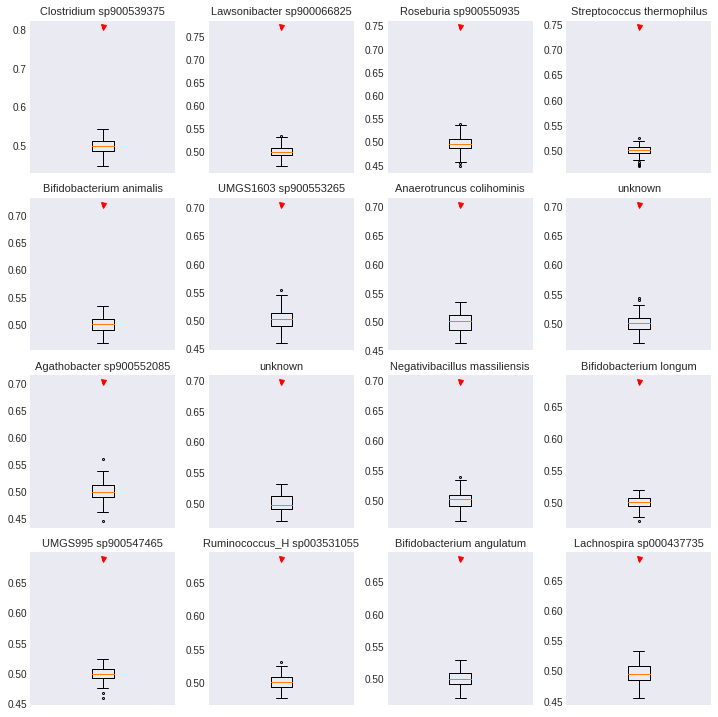

In [27]:
series_list = []
microbe_name_list = []

for microbe_index in top_microbes.index:
    mic_perm_scores = microbes_perm_scores_auc.loc[microbe_index]
    true_score = lgbm_diet_auc.loc[microbe_index]
    mic_scores = pd.concat([mic_perm_scores, pd.Series([true_score])], ignore_index=True)
    series_list.append(mic_scores)
    microbe_name_list.append(mb_names.loc[targets[microbe_index], 'species_new'])

# Plotting
plt.style.use('seaborn-dark')
fig, axs = plt.subplots(4, 4, figsize=(10, 10))

for i in range(4):
    for j in range(4):
        axs[i, j].boxplot(series_list[i * 4 + j], flierprops=dict(markersize=2))
        true_score = series_list[i * 4 + j].iloc[-1]
        axs[i, j].plot(1, true_score, 'rv', markersize=5)
        axs[i, j].set_xticks([])
        axs[i, j].set_title(microbe_name_list[i * 4 + j], fontsize=11)

plt.tight_layout()
plt.show()

plt.style.use('default')

In [28]:
# p value cutoff for p < 0.01
microbes_perm_scores_auc["true_scores"] = lgbm_diet_auc
microbes_perm_scores_auc['true_is_max'] = microbes_perm_scores_auc.apply(lambda row: row['true_scores'] >= max(row.drop('true_scores')), axis=1)
microbes_perm_scores_auc['true_is_max'].sum()

/usr/wisdom/python3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


/usr/wisdom/python3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


662

In [29]:
significant_targets = [target for target, m in zip(targets, microbes_perm_scores_auc['true_is_max']) if m]
print(targets)
print(significant_targets)


['fBin__100|gBin__473|sBin__693', 'fBin__100|gBin__473|sBin__694', 'fBin__100|gBin__474|sBin__695', 'fBin__100|gBin__477|sBin__698', 'fBin__100|gBin__481|sBin__704', 'fBin__100|gBin__481|sBin__705', 'fBin__100|gBin__481|sBin__706', 'fBin__100|gBin__483|sBin__709', 'fBin__102|gBin__490|sBin__720', 'fBin__102|gBin__490|sBin__721', 'fBin__102|gBin__490|sBin__722', 'fBin__103|gBin__491|sBin__727', 'fBin__104|gBin__493|sBin__730', 'fBin__104|gBin__494|sBin__731', 'fBin__104|gBin__495|sBin__732', 'fBin__104|gBin__496|sBin__733', 'fBin__104|gBin__496|sBin__734', 'fBin__104|gBin__498|sBin__736', 'fBin__104|gBin__500|sBin__738', 'fBin__108|gBin__515|sBin__766', 'fBin__108|gBin__515|sBin__767', 'fBin__108|gBin__517|sBin__769', 'fBin__108|gBin__521|sBin__773', 'fBin__108|gBin__523|sBin__776', 'fBin__108|gBin__525|sBin__778', 'fBin__108|gBin__526|sBin__779', 'fBin__108|gBin__531|sBin__787', 'fBin__121|gBin__564|sBin__834', 'fBin__121|gBin__566|sBin__836', 'fBin__121|gBin__568|sBin__838', 'fBin__12

In [30]:
significant_targets_index = [index for index, (target, m) in enumerate(zip(targets, microbes_perm_scores_auc['true_is_max'])) if m]
print(targets)
print(significant_targets_index)


['fBin__100|gBin__473|sBin__693', 'fBin__100|gBin__473|sBin__694', 'fBin__100|gBin__474|sBin__695', 'fBin__100|gBin__477|sBin__698', 'fBin__100|gBin__481|sBin__704', 'fBin__100|gBin__481|sBin__705', 'fBin__100|gBin__481|sBin__706', 'fBin__100|gBin__483|sBin__709', 'fBin__102|gBin__490|sBin__720', 'fBin__102|gBin__490|sBin__721', 'fBin__102|gBin__490|sBin__722', 'fBin__103|gBin__491|sBin__727', 'fBin__104|gBin__493|sBin__730', 'fBin__104|gBin__494|sBin__731', 'fBin__104|gBin__495|sBin__732', 'fBin__104|gBin__496|sBin__733', 'fBin__104|gBin__496|sBin__734', 'fBin__104|gBin__498|sBin__736', 'fBin__104|gBin__500|sBin__738', 'fBin__108|gBin__515|sBin__766', 'fBin__108|gBin__515|sBin__767', 'fBin__108|gBin__517|sBin__769', 'fBin__108|gBin__521|sBin__773', 'fBin__108|gBin__523|sBin__776', 'fBin__108|gBin__525|sBin__778', 'fBin__108|gBin__526|sBin__779', 'fBin__108|gBin__531|sBin__787', 'fBin__121|gBin__564|sBin__834', 'fBin__121|gBin__566|sBin__836', 'fBin__121|gBin__568|sBin__838', 'fBin__12

In [31]:
with open(home_path + 'data/classification/significant_targets.pkl', 'wb') as file:
    pickle.dump(significant_targets, file)

In [32]:
print(f"{len(significant_targets)} out of {len(targets)} LGBM predictions ({round((len(significant_targets)/len(targets))*100, 2)}) are significant with p value < 0.01")

661 out of 725 LGBM predictions (91.17) are significant with p value < 0.01


In [33]:
microbes_perm_scores_auc['max'] = microbes_perm_scores_auc.drop("true_is_max", axis=1).max(axis=1)
random_max = microbes_perm_scores_auc[~microbes_perm_scores_auc['true_is_max']]
print("Highest overall random score:", random_max['max'].max())

Highest overall random score: 0.5897113785207714


/usr/wisdom/python3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
microbes_perm_scores_auc

,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,true_scores,true_is_max,max
0,0.492884,0.500695,0.514559,0.472337,0.493485,0.483666,0.510382,0.487440,0.506355,0.487782,...,0.490027,0.496412,0.517881,0.498956,0.496655,0.488598,0.489221,0.575341,True,0.575341
1,0.469314,0.485246,0.492136,0.481992,0.532375,0.486119,0.469531,0.507909,0.528604,0.497571,...,0.493632,0.489549,0.477403,0.482068,0.495176,0.493200,0.498346,0.576980,True,0.576980
2,0.506206,0.505475,0.531178,0.485096,0.493726,0.512241,0.492901,0.499699,0.516170,0.496305,...,0.493422,0.490437,0.504039,0.504332,0.500073,0.498571,0.512363,0.520111,False,0.537644
3,0.494453,0.518703,0.488924,0.496684,0.514105,0.483320,0.515760,0.484896,0.495037,0.505422,...,0.510342,0.499836,0.512012,0.486747,0.504646,0.499201,0.503932,0.574544,True,0.574544
4,0.497880,0.508429,0.482290,0.507343,0.480743,0.511152,0.475326,0.487991,0.496529,0.511623,...,0.516908,0.493120,0.496935,0.490629,0.484552,0.484732,0.502965,0.539454,True,0.539454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
721,0.497274,0.490934,0.466612,0.490292,0.499702,0.531253,0.488717,0.487868,0.494404,0.471197,...,0.485653,0.497582,0.524797,0.506728,0.531620,0.520486,0.519362,0.556455,True,0.556455
722,0.505859,0.531048,0.511672,0.487131,0.492373,0.484930,0.519136,0.465021,0.513173,0.490037,...,0.528073,0.518992,0.499674,0.509117,0.501969,0.494982,0.482906,0.567446,True,0.567446
723,0.495768,0.519735,0.492701,0.466509,0.510609,0.503402,0.530585,0.512064,0.514930,0.505553,...,0.494851,0.500312,0.498671,0.502321,0.496861,0.473712,0.509462,0.559770,True,0.559770
724,0.507300,0.512102,0.499932,0.487606,0.511828,0.493753,0.498547,0.524133,0.504142,0.497296,...,0.500679,0.484973,0.490867,0.499604,0.500617,0.501018,0.501421,0.538062,True,0.538062


In [35]:
# Function to count correlations greater or equal to the true correlation
def count_better_correlations(row):
    true_corr = row['true_scores']
    return sum(row[:-1] >= true_corr)

microbes_perm_scores_auc['better_perm_count'] = microbes_perm_scores_auc.drop(["true_is_max", "max"], axis=1).apply(count_better_correlations, axis=1)

/usr/wisdom/python3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [36]:
microbes_perm_scores_auc['better_perm_count']

0      0
1      0
2      5
3      0
4      0
      ..
721    0
722    0
723    0
724    0
725    0
Name: better_perm_count, Length: 726, dtype: int64

In [37]:
microbes_perm_scores_auc['better_perm_count'][microbes_perm_scores_auc['better_perm_count'] > 0]

2       5
8       4
10      5
16      7
57      5
       ..
690     4
691     1
696    43
697     6
715     3
Name: better_perm_count, Length: 64, dtype: int64

#### Analyzing non-significant microbes

In [38]:
non_significant_microbes = [target for target, m in zip(targets, microbes_perm_scores_auc['true_is_max']) if not m]
non_significant_microbes

['fBin__100|gBin__474|sBin__695',
 'fBin__102|gBin__490|sBin__720',
 'fBin__102|gBin__490|sBin__722',
 'fBin__104|gBin__496|sBin__734',
 'fBin__207|gBin__800|sBin__1211',
 'fBin__247|gBin__900|sBin__1378',
 'fBin__257|gBin__952|sBin__1448',
 'fBin__257|gBin__961|sBin__1466',
 'fBin__28|gBin__70|sBin__89',
 'fBin__320|gBin__1288|sBin__1921',
 'fBin__366|gBin__1449|sBin__2149',
 'fBin__366|gBin__1449|sBin__2150',
 'fBin__366|gBin__1453|sBin__2156',
 'fBin__367|gBin__1467|sBin__2179',
 'fBin__367|gBin__1467|sBin__2181',
 'fBin__369|gBin__1495|sBin__2219',
 'fBin__369|gBin__1495|sBin__2222',
 'fBin__376|gBin__1556|sBin__2324',
 'fBin__37|gBin__91|sBin__130',
 'fBin__382|gBin__1577|sBin__2355',
 'fBin__441|gBin__1705|sBin__2508',
 'fBin__455|gBin__1767|sBin__2575',
 'fBin__457|gBin__1780|sBin__2592',
 'fBin__45|gBin__157|sBin__237',
 'fBin__45|gBin__157|sBin__238',
 'fBin__45|gBin__157|sBin__239',
 'fBin__45|gBin__169|sBin__259',
 'fBin__484|gBin__1838|sBin__2668',
 'fBin__519|gBin__1938|sB

In [39]:
# mb_names.loc[non_significant_microbes].to_csv("non_significant_microbes.csv", index=False)

In [40]:
mb_names.loc[non_significant_microbes]

,Unnamed: 0,kingdom,phylum,class,order,family,genus,species,sBin,gBin,fBin,dist_SGB,sSGB,gSGB,fSGB
fBin__100|gBin__474|sBin__695,Rep_695,Bacteria,Proteobacteria,Gammaproteobacteria,Burkholderiales,Burkholderiaceae,Duodenibacillus,Duodenibacillus massiliensis,695.0,474.0,100,0.019187,9273,6564,2399
fBin__102|gBin__490|sBin__720,Rep_720,Bacteria,Verrucomicrobiota,Verrucomicrobiae,Verrucomicrobiales,Akkermansiaceae,Akkermansia,Akkermansia muciniphila_A,720.0,490.0,102,0.011023,9225,6531,2382
fBin__102|gBin__490|sBin__722,Rep_722,Bacteria,Verrucomicrobiota,Verrucomicrobiae,Verrucomicrobiales,Akkermansiaceae,Akkermansia,Akkermansia muciniphila_B,722.0,490.0,102,0.013972,9228,6531,2382
fBin__104|gBin__496|sBin__734,Rep_734,Bacteria,Verrucomicrobiota,Lentisphaeria,Victivallales,Victivallaceae,Victivallis,Victivallis sp900550905,734.0,496.0,104,0.029585,9197,6512,2377
fBin__207|gBin__800|sBin__1211,Rep_1211,Bacteria,Firmicutes,Bacilli,RFN20,CAG-288,CAG-568,CAG-568 sp000434395,1211.0,800.0,207,0.025319,1024,781,343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fBin__73|gBin__358|sBin__515,Rep_515,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Bacteroidaceae,Phocaeicola,Phocaeicola coprophilus,515.0,358.0,73,0.017995,1888,1383,595
fBin__73|gBin__362|sBin__519,Rep_519,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Bacteroidaceae,Phocaeicola,unknown,519.0,362.0,73,0.055276,unknown,1353,595
fBin__76|gBin__381|sBin__552,Rep_552,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Tannerellaceae,Parabacteroides,Parabacteroides distasonis,552.0,381.0,76,0.021304,1934,1409,599
fBin__76|gBin__384|sBin__557,Rep_557,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Tannerellaceae,Parabacteroides,Parabacteroides goldsteinii,557.0,384.0,76,0.020686,1941,1412,599


In [41]:
mb_names['phylum'].value_counts()

Firmicutes_A         486
Bacteroidota          86
Firmicutes            52
Proteobacteria        28
Actinobacteriota      25
Firmicutes_C          17
Verrucomicrobiota     14
Desulfobacterota       9
Cyanobacteria          5
Firmicutes_B           2
Methanobacteriota      1
Name: phylum, dtype: int64

## Plots

#### Overall results for Eran

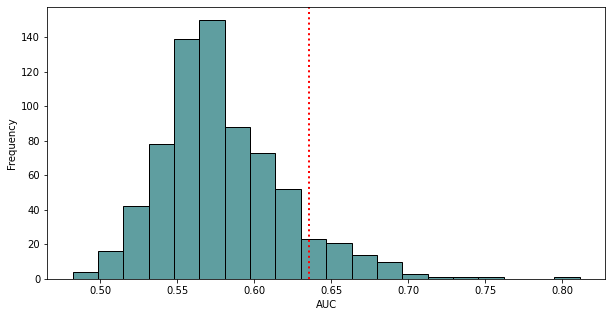

In [38]:
plt.figure(figsize=(10, 5))
plt.hist(lgbm_diet_auc, bins=20, edgecolor='black', color='cadetblue')
plt.xlabel("AUC", fontsize=10)
plt.ylabel("Frequency")
plt.axvline(percentile_99, color='red', linestyle='dotted', linewidth=2, label="99th percentile of permutations")
# plt.title('Distribution of Correlation Values Across All Species', fontsize=12)
plt.savefig(home_path + "figures/classification/abundance_auc_distribution.pdf", dpi=300, facecolor="white", transparent=False, bbox_inches='tight')
plt.show()

In [ ]:
neg_log_pvalues = -np.log10(lgbm_diet_pvalues)

# Creating the volcano plot
plt.figure(figsize=(8, 6))
plt.scatter(lgbm_diet_auc, neg_log_pvalues, c='gray', alpha=0.7)

# Highlight significant points
sig_threshold = 0.05
highly_significant = lgbm_diet_pvalues < sig_threshold
plt.scatter(
    lgbm_diet_auc[highly_significant], 
    neg_log_pvalues[highly_significant], 
    color='cadetblue', 
    alpha=0.5,
    label=f'p < {sig_threshold}'
)

# Adding labels and reference lines
plt.axhline(-np.log10(sig_threshold), color='black', linestyle='--', label=f'-log10({sig_threshold})')
plt.axvline(0, color='black', linestyle='-')
plt.xlabel("LGBM Diet Scores (Effect Size)")
plt.ylabel("-log10(p-value)")
plt.title("Volcano Plot of LGBM Diet Scores")
plt.legend()
plt.show()

In [40]:
series_list = []
microbe_name_list = []
mic_index_list = []

for microbe_index in top_microbes.head(2).index:
    mic_index_list.append(microbe_index)
    mic_perm_scores = microbes_perm_scores_auc.loc[microbe_index]
    true_score = lgbm_diet_auc.loc[microbe_index]
    mic_scores = pd.concat([mic_perm_scores, pd.Series([true_score])], ignore_index=True)
    series_list.append(mic_scores)
    microbe_name_list.append(mb_names.loc[targets[microbe_index], 'species_new'])

NameError: name 'top_microbes' is not defined

In [41]:
pd.Series(lgbm_diet_preds[mic_index_list[0]]).sort_values()

IndexError: list index out of range

In [42]:

def moving_average(targets, preds, name):
    # Sorting by measured values to determine the order
    order_based_on_measured = np.argsort(targets)

    # Sorting predicted values based on the order determined by measured values
    sorted_predicted_values = pd.Series(preds)[order_based_on_measured]
    # Window sizes
    window_sizes = [100, 500, 1000]

    # Plotting moving averages for sorted predicted values
    plt.figure(figsize=(10, 6))
    for window_size in window_sizes:
        moving_avg = pd.Series(sorted_predicted_values).rolling(window=window_size).mean()
        plt.plot(moving_avg.reset_index(drop=True), label=f'Predicted Values MA-{window_size}', linewidth=1, alpha=0.8)

    # plt.title(f'Moving Window Average of Predicted Values - {name}')
    plt.title(f'{name}', fontsize=18)
    plt.xlabel('Subject Index (Sorted by Measured Values)', fontsize=14)
    plt.ylabel('Moving Average of Predicted Values', fontsize=14)
    plt.legend()
    plt.savefig(home_path + f"figures/classification/moving_average_{name}.pdf", dpi=300, facecolor="white", transparent=False, bbox_inches='tight')
    plt.show()

moving_average(lgbm_diet_targets[mic_index_list[0]], lgbm_diet_preds[mic_index_list[0]], microbe_name_list[0] + f" - {round(lgbm_diet_auc[mic_index_list[0]], 2)} Correlation")

IndexError: list index out of range

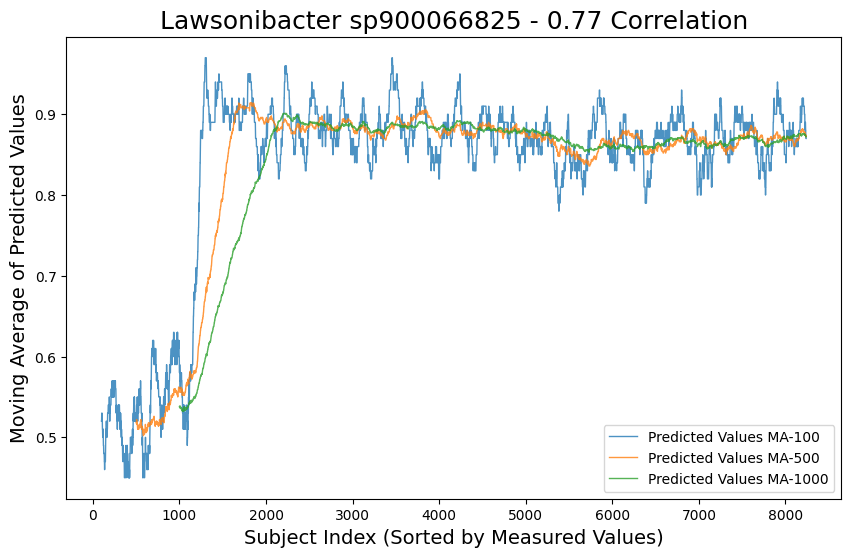

In [46]:
moving_average(lgbm_diet_targets[mic_index_list[1]], lgbm_diet_preds[mic_index_list[1]], microbe_name_list[1] + f" - {round(lgbm_diet_auc[mic_index_list[1]], 2)} Correlation")

In [47]:
lgbm_diet_auc.min()

0.453798756057896

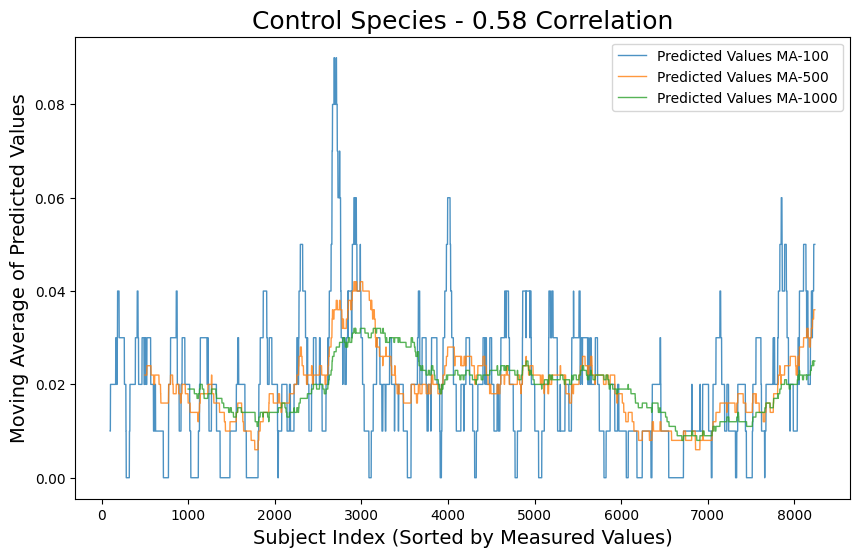

In [48]:
moving_average(lgbm_diet_targets[0], lgbm_diet_preds[0], f"Control Species - {round(lgbm_diet_auc[0], 2)} Correlation")

#### How do Logistic Regression and LGBM scores compare?

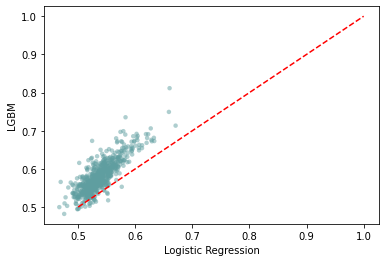

<Figure size 432x288 with 0 Axes>

In [45]:
%matplotlib inline
U, p = stats.mannwhitneyu(log_diet_auc, lgbm_diet_auc, alternative='two-sided')
to_plot = pd.concat([log_diet_auc, lgbm_diet_auc] , axis=1)
to_plot.columns = ["Logistic Regression", "LGBM"]
to_plot.plot.scatter("Logistic Regression", "LGBM", alpha=0.5, color='cadetblue', edgecolors='none')
# plt.title("Pearson Correlation Logistic Regression VS LGBM")
plt.plot([0.5, 1], [0.5, 1], 'r--')
# plt.grid()
# plt.text(0.45, plt.ylim()[0] + 0.05 * (plt.ylim()[1] - plt.ylim()[0]), f'p-value: {p:.2f}', ha='center', va='center', bbox=dict(facecolor='white', edgecolor='white'))
plt.savefig(home_path + "figures/classification/logreg_vs_lgbm_scatter.pdf", dpi=300, facecolor="white", transparent=False, bbox_inches='tight')
plt.show()
plt.clf()

### How do age and gender compare?

In [46]:
lgbm_base_auc = pd.Series(lgbm_base_auc)

U, p = stats.mannwhitneyu(lgbm_base_auc, lgbm_diet_auc, alternative='two-sided')
to_plot = pd.concat([lgbm_base_auc, lgbm_diet_auc] , axis=1)
to_plot.columns = ["Age + Gender", "All Features"]
to_plot.plot.scatter("Age + Gender", "All Features", c='cadetblue', edgecolors='none', alpha=0.5)
# plt.title("Abundances Targets")
plt.plot([0.5, 1], [0.5, 1], 'r--')
# plt.grid()
# plt.text(0.5, plt.ylim()[0] + 0.05 * (plt.ylim()[1] - plt.ylim()[0]), f'p-value: {p:.2f}', ha='center', va='center', bbox=dict(facecolor='white', edgecolor='white'))
plt.savefig(home_path + "figures/classification/lgbm_base_diet_scatter.pdf", dpi=300, facecolor="white", transparent=False, bbox_inches='tight')
plt.show()
plt.clf()

NameError: name 'lgbm_base_auc' is not defined

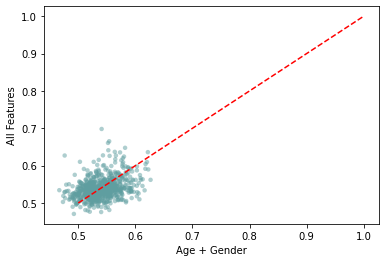

<Figure size 432x288 with 0 Axes>

In [51]:
log_base_auc = pd.Series(log_base_auc)

U, p = stats.mannwhitneyu(log_base_auc, log_diet_auc, alternative='two-sided')
to_plot = pd.concat([log_base_auc, log_diet_auc] , axis=1)
to_plot.columns = ["Age + Gender", "All Features"]
to_plot.plot.scatter("Age + Gender", "All Features", c='cadetblue', edgecolors='none', alpha=0.5)
# plt.title("Abundances Targets")
plt.plot([0.5, 1], [0.5, 1], 'r--')
# plt.grid()
# plt.text(0.5, plt.ylim()[0] + 0.05 * (plt.ylim()[1] - plt.ylim()[0]), f'p-value: {p:.2f}', ha='center', va='center', bbox=dict(facecolor='white', edgecolor='white'))
plt.savefig(home_path + "figures/classification/logreg_base_diet_scatter.pdf", dpi=300, facecolor="white", transparent=False, bbox_inches='tight')
plt.show()
plt.clf()

#### What is the corr diference between the highly predicted microbes in LGBM and Logistic Regression?
Maybe those with high signal will show a significant difference between the models.

In [52]:
highly_pred_microbes_lgbm = lgbm_diet_auc.sort_values(ascending=False)
highly_pred_microbes_lgbm = highly_pred_microbes_lgbm[highly_pred_microbes_lgbm > 0.2]
highly_pred_microbes_lgbm

76     0.805065
596    0.768452
231    0.746234
46     0.743667
27     0.719296
         ...   
696    0.499799
640    0.493717
386    0.487155
387    0.479410
664    0.453799
Name: 1, Length: 726, dtype: float64

In [53]:
highly_pred_microbes_logreg = log_diet_auc.sort_values(ascending=False)
highly_pred_microbes_logreg = highly_pred_microbes_logreg[highly_pred_microbes_logreg > 0.2]
highly_pred_microbes_logreg

46     0.698234
76     0.665353
596    0.660882
32     0.647764
588    0.641202
         ...   
443    0.481136
386    0.479991
655    0.476687
16     0.475864
387    0.470809
Name: 1, Length: 726, dtype: float64

#### Robustness Check

Abundance:

In [54]:
# def read_robustness(TARGETS):

#     MODEL = 'LGBM' # 'LGBM' or 'logistic'
#     STAGE = 'baseline' # 'baseline' or '02_visit'
#     # suffix = '_all_baseline' if SPLIT == 'all_baseline' else '' 
#     PROBLEM = '' # 'classification' or '' for regression
#     robustness_results = []

#     test_02_visit = pd.read_pickle(home_path + "data/diet_mb_02_visit.pkl")
        
#     baseline_subjects = list(diet_mb.index)
#     visit_subjects = list(test_02_visit.index)
#     print("Length of baseline_subjects:", len(baseline_subjects))
#     print("Length of visit_subjects:", len(visit_subjects))
#     test_baseline = diet_mb.loc[diet_mb.index.isin(visit_subjects)]
#     test_02_visit = test_02_visit.loc[test_02_visit.index.isin(test_baseline.index)]
#     print(test_baseline.shape)  
#     print(test_02_visit.shape) 
#     # test_baseline is my holdout set 
#     current_df = diet_mb.loc[~diet_mb.index.isin(visit_subjects)].copy()

#     n_samples = len(current_df)
#     samples = []

#     iteration = 1
#     while n_samples > 1:
#         samples.append(n_samples)
#         print(f"Iteration {iteration}: {n_samples} samples")
#         loaded = pickle.load(open(home_path + "robustness/output_" + MODEL + '_' + TARGETS + '_' + str(n_samples) + '_samples' + PROBLEM + '.pkl', "rb"))
#         robustness_results.append(loaded)
#         # Reduce samples by half for the next iteration
#         n_samples = math.ceil(n_samples / 2)  # Use math.ceil to ensure at least one sample
#         current_df = current_df.sample(n=n_samples, random_state=iteration).reset_index(drop=True)
#         iteration += 1

#     return robustness_results, samples


# def robustness_calc(robustness_results, samples, TARGETS):
#     if TARGETS == "div":
#         print("div")
#         robustness_scores_richness = []
#         robustness_scores_shannon = []
#         for result in robustness_results:
#             robustness_scores, robustness_pvalues, robustness_coefs, robustness_preds, robustness_targets = read_results(result)
#             robustness_scores_richness.append(robustness_scores[0])
#             robustness_scores_shannon.append(robustness_scores[1])

#         nan_index = np.isnan(robustness_scores_richness).argmax()
#         robustness_scores_richness = robustness_scores_richness[:nan_index]
#         robustness_scores_shannon = robustness_scores_shannon[:nan_index]
#         samples = samples[:nan_index]

#         iterations = list(range(1, nan_index + 1))

#         return robustness_scores_richness, robustness_scores_shannon, iterations, samples

#     elif TARGETS == "abundance":
#         print("abundance")
#         robustness_means = []
#         robustness_stds = []
#         for result in robustness_results:
#             robustness_scores, robustness_pvalues, robustness_coefs, robustness_preds, robustness_targets = read_results(result)
#             robustness_means.append(robustness_scores.mean())
#             robustness_stds.append(robustness_scores.std())


#         nan_index = np.isnan(robustness_means).argmax()
#         robustness_means = robustness_means[:nan_index]
#         robustness_stds = robustness_stds[:nan_index]
#         samples = samples[:nan_index]

#         iterations = list(range(1, nan_index + 1))

#         return robustness_means, robustness_stds, iterations, samples


In [55]:
# robustness_results, samples = read_robustness("abundance")
# robustness_means, robustness_stds, iterations, samples = robustness_calc(robustness_results, samples, "abundance")

# print(robustness_means)
# print(robustness_stds)
# print(iterations)
# print(samples)

In [56]:
# # Abundance

# def plot_robustness_abundance(robustness_means, robustness_stds, samples):
#     # Plot mean with standard deviations as error bars
#     plt.figure(figsize=(12, 6))
#     plt.errorbar(
#         samples,
#         robustness_means,
#         yerr=robustness_stds,
#         fmt='-o',
#         capsize=5,
#         label="Mean Pearson Correlations",
#         # ecolor='black', 
#         color='cadetblue'
#     )

#     # Formatting
#     # plt.title("Mean Pearson Correlations per Number of Subjects")
#     plt.xlabel("Number of Subjects per Iteration", fontsize=14)
#     plt.ylabel("Mean Pearson Correlation ± STD", fontsize=14)
#     # plt.xscale("log")  # Log scale for better visibility
#     plt.xticks(samples, rotation=90)
#     plt.grid(alpha=0.5, linestyle='--')
#     # plt.legend()

#     # Show plot
#     plt.tight_layout()
#     plt.savefig(home_path + "figures/classification/abundance_robustness.pdf", dpi=300, facecolor="white", transparent=False, bbox_inches='tight')
#     plt.show()


# plot_robustness_abundance(robustness_means, robustness_stds, samples)

### Comparison between classification and regression

In [57]:
lgbm_diet_r, lgbm_diet_r_pvalues, lgbm_diet_r_coefs, lgbm_diet_r_preds, lgbm_diet_r_targets = read_results(pd.read_pickle(home_path + "data/output_LGBM_abundance.pkl"))
print(lgbm_diet_r)

0      0.047078
1      0.097243
2      0.029923
3      0.125306
4      0.014148
         ...   
721    0.025516
722    0.064619
723    0.047833
724    0.063186
725    0.077638
Name: 0, Length: 726, dtype: float64


In [58]:
lgbm_mircrobes_perm_r = pd.read_pickle(home_path + "data/output_LGBM_abundance_perm.pkl")
microbes_perm_scores_r = lgbm_mircrobes_perm_r.loc[:, 0]
permutation_scores_r = microbes_perm_scores_r.iloc[:, :-4]
percentile_99_r = np.percentile(permutation_scores_r.values.flatten(), 99)
percentile_99_r

0.03145057461974587

In [59]:
# Calculate the ratios
acc_ratio = lgbm_diet_acc / percentile_99
r_ratio = lgbm_diet_r / percentile_99_r

# Create a DataFrame for easier manipulation and visualization
ratios_df = pd.DataFrame({
    'Microbe': range(len(targets)),
    'Acc_Ratio': acc_ratio,
    'R_Ratio': r_ratio
})

# Visualize
plt.figure(figsize=(7.09, 5))

# Plot 1: Classification (AUC) Ratios
plt.scatter(ratios_df['Microbe'], ratios_df['Acc_Ratio'], alpha=0.6, label='AUC Ratios')
plt.axhline(y=1, color='r', linestyle='--', label='Baseline (Ratio = 1)')
plt.title('Comparison of Classification (AUC) Ratios to Baseline')
plt.xlabel('Microbe Index')
plt.ylabel('AUC Ratio to Baseline')
plt.legend()
plt.show()

# Plot 2: Regression (Pearson Correlation) Ratios
plt.figure(figsize=(7.09, 5))
plt.scatter(ratios_df['Microbe'], ratios_df['R_Ratio'], alpha=0.6, label='Pearson Correlation Ratios', color='g')
plt.axhline(y=1, color='r', linestyle='--', label='Baseline (Ratio = 1)')
plt.title('Comparison of Regression (Pearson Correlation) Ratios to Baseline')
plt.xlabel('Microbe Index')
plt.ylabel('Correlation Ratio to Baseline')
plt.legend()
plt.show()

# Combined visualization: Both metrics
plt.figure(figsize=(7.09, 5))
plt.scatter(ratios_df['Microbe'], ratios_df['Acc_Ratio'], alpha=0.6, label='AUC Ratios')
plt.scatter(ratios_df['Microbe'], ratios_df['R_Ratio'], alpha=0.6, label='Pearson Correlation Ratios', color='g')
plt.axhline(y=1, color='r', linestyle='--', label='Baseline (Ratio = 1)')
plt.title('Comparison of AUC and Pearson Correlation Ratios to Baseline')
plt.xlabel('Microbe Index')
plt.ylabel('Ratio to Baseline')
plt.legend()
plt.show()

ValueError: array length 725 does not match index length 726